In [1]:
#1
import random
from random import randint
import numpy as np
from matplotlib import pyplot as plt 
import networkx as nx

#1.2: Setting Parameters

N=795
L=.01 #rate of indefction from an infected node to it's neighbour.
R=10 #number of realizations
T=300 #length of simulations (number of time-steps)

In [2]:
#2: Define file
namename="High_School.graphml" #give the name of the data file here + make sure it is in the right folder

In [3]:
#3.1 Highschool
highschool = nx.read_graphml(namename)

#3.2 Watts Strogatz
watts_strogatz = nx.watts_strogatz_graph(N,9,.9)

#3.3 Erdos Renyi
erdos_renyi = nx.erdos_renyi_graph(N,0.011, directed = False)

#3.4 Barbasi Albert
barabasi_albert = nx.barabasi_albert_graph(N, 4)

#3.5 Config (configuration model with the same degree sequence as Highschool network)
degree_sequence=list(nx.degree(highschool).values())
config = nx.configuration_model(degree_sequence)


In [4]:
#4
#select the network

g=config
#g= highschool
#g = watts_strogatz
#g= erdos_renyi

In [5]:
#5: Building dataframe with number of simulations? + creating an array
IAR=([float(0)] * T)
v1=np.array(IAR)

In [6]:
#6: Filling dataframe with data

for r in list(range(0,R)):
    nx.set_node_attributes(g, 'state', 's')
    seed=int(randint(0,N-1))
    g.nodes(data=True)[seed][1]['state']='i'
    iar=list();

    for t in list(range(0,T)):
        for node in g.nodes_iter(data=True):
            if node[1]['state'] == 'i':
                for neighb in g.neighbors(node[0]):
                    p = random.random()
                    if p < L:
                        g.node[neighb]['state'] = "i"
        i_all_ratio=float(sum(node[1]['state']=='i' for node in g.nodes_iter(data=True)))/float(N)
        iar.append(i_all_ratio)
        v2=np.array(iar)
    #adding up the two arrays
    v1 = v1 + v2
v=v1/R

In [7]:
#7
#Creating some text for the report and diagram legend

dict_models={highschool:'The Highschool Network',
             watts_strogatz:'Small World (Watts-Strogatz) Model',
             barabasi_albert:'Preferential Attachment (Barbasi-Albert) Model',
             erdos_renyi:'Random (Erdos-Renyi) Model)',
             config:'Configuration Model'}

model_name=dict_models[g]


# Retrieving halfway points
counter = 0
print("I ran the spreading model",R ,"times on", model_name)

print(dict_models[g])


for value in v:
    #print("ratio of infected nodes: " , value/float(R))  
    counter+=1
    if value > 0.5:
        print("The halfway point is:", counter, "time-steps")
        break
    else:
        if counter == 300:
            print("The halfway point has not been reached. \nThe final infection rate was:", value) 
            

I ran the spreading model 10 times on Configuration Model
Configuration Model
The halfway point is: 82 time-steps


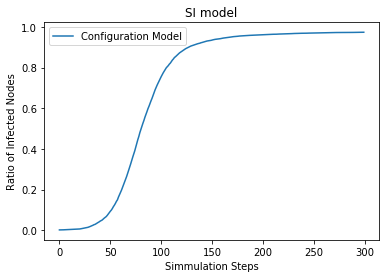

In [8]:
#8
plt.title("SI model") 
plt.xlabel("Simmulation Steps") 
plt.ylabel("Ratio of Infected Nodes") 
plt.plot(v) 
plt.legend([model_name])
plt.show()